In [43]:
import cv2
import numpy as np
import pandas as pd
import statistics
import torch
import os
import time
import matplotlib.pyplot as plt
import math
import torch.nn.functional as F
import torchvision.transforms as tf
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
from torchvision.utils import make_grid
from PIL import Image
from collections import OrderedDict
import seaborn as sns

torch.cuda.empty_cache()


In [44]:
modelA = torch.load('modelA_bw.pth',map_location=torch.device('cuda:0'))
modelB = torch.load('modelB_bw.pth',map_location=torch.device('cuda:0'))

In [45]:
print(modelA)
print(modelB)

AlexNet(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, 

In [46]:
#full_core = cv2.imread('../Machine Learning_GARTH/Garth_base_oriented.jpg')
#full_core = cv2.cvtColor(full_core,cv2.COLOR_BGR2RGB)

Image.MAX_IMAGE_PIXELS = None

full_core = np.array(Image.open('../Machine Learning_GARTH/Gelito5_oriented2.jpg'))
#full_core = np.array(Image.open('../Machine Learning_GARTH/Garth_base_oriented.jpg').getchannel('G'))


trans = tf.Compose([tf.Resize((256,256), interpolation=2),
                  tf.ToTensor(),
                   ])

In [47]:
#Slice the Image


In [77]:
h_in = 20
w_in = h_in

h = full_core.shape[0]
w = full_core.shape[1]

n_h = h//h_in
n_w = w//w_in

r_h = h%h_in
r_w = w%w_in

print(h,w)
print(r_h,r_w)
print(n_h,n_w)

full_core = full_core[int(r_h/2):(h-int(r_h/2)),int(r_w/2):(w-int(r_w/2))]

3360 31121
0 1
168 1556


In [78]:
#Feed in the image and collect results

In [79]:
quality_matrix = np.zeros((n_h,n_w), dtype = int) 
layer_matrix = np.zeros((n_h,n_w), dtype = float)

w_point = 0
start_time = time.time()

for j in range(n_w):
    if j%15 ==0:
        print(f'{j//15*10:.1F}%')
    h_point = 0
    for i in range(n_h):        
        active_image = full_core[h_point:h_point+h_in,w_point:w_point+w_in]
        active_image = Image.fromarray(active_image)
        
        h_point+=h_in
        
        quality_matrix[i,j] =  modelA(trans(active_image).view(1,1,256,256).cuda()).argmax(dim=1).item()
        
        if quality_matrix[i,j]==2:
            layer_matrix[i,j] =   modelB(trans(active_image).view(1,1,256,256).cuda()).item()
            
    w_point+=w_in

print(time.time()-start_time)
        
        

0.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
110.0%
120.0%
130.0%
140.0%
150.0%
160.0%
170.0%
180.0%
190.0%
200.0%
210.0%
220.0%
230.0%
240.0%
250.0%
260.0%
270.0%
280.0%
290.0%
300.0%
310.0%
320.0%
330.0%
340.0%
350.0%
360.0%
370.0%
380.0%
390.0%
400.0%
410.0%
420.0%
430.0%
440.0%
450.0%
460.0%
470.0%
480.0%
490.0%
500.0%
510.0%
520.0%
530.0%
540.0%
550.0%
560.0%
570.0%
580.0%
590.0%
600.0%
610.0%
620.0%
630.0%
640.0%
650.0%
660.0%
670.0%
680.0%
690.0%
700.0%
710.0%
720.0%
730.0%
740.0%
750.0%
760.0%
770.0%
780.0%
790.0%
800.0%
810.0%
820.0%
830.0%
840.0%
850.0%
860.0%
870.0%
880.0%
890.0%
900.0%
910.0%
920.0%
930.0%
940.0%
950.0%
960.0%
970.0%
980.0%
990.0%
1000.0%
1010.0%
1020.0%
1030.0%
633.0009717941284


In [80]:
active_image.size

(20, 20)

In [81]:
layer_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [82]:
#save model

tosave = pd.DataFrame(layer_matrix)
tosave.head()
tosave.to_csv('layer_matrix_2.csv',index=False, header=True)



In [83]:
#load model
toload=pd.read_csv('layer_matrix_2.csv')
layer_matrix1 = toload.to_numpy()
layer_matrix= layer_matrix1

In [84]:
full_core_density_bin = np.zeros((full_core.shape[0],full_core.shape[1]), dtype = float)

for j in range(full_core_density_bin.shape[1]-1):
    if j%3800 ==0:
        print(f'{j//3800*10:.1F}%')
    for i in range(full_core_density_bin.shape[0]):
        full_core_density_bin[i,j]=layer_matrix[i//h_in,j//w_in]

0.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%


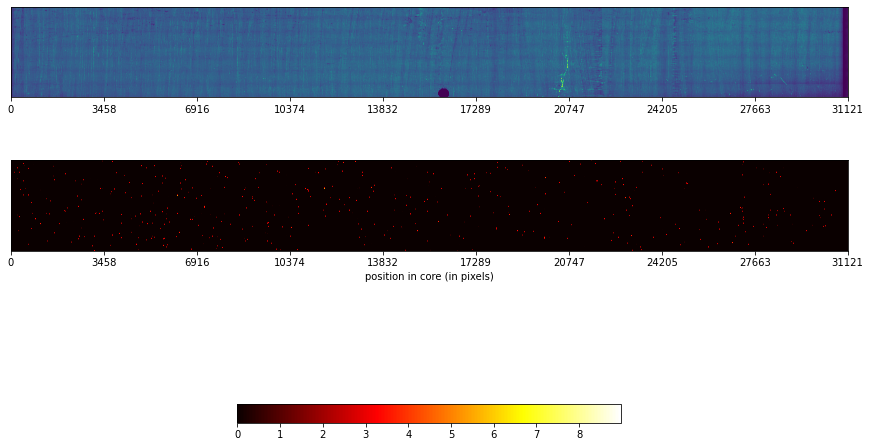

In [85]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1, sharex=False)

im = ax2.imshow(full_core_density_bin,cmap='hot')
fig.colorbar(im, ax = ax3, orientation='horizontal')

#ax1.set_xticklabels()
fig.set_figheight(8)
fig.set_figwidth(15)
ax1.imshow(full_core)
ax1.set_yticks([])
ax2.set_yticks([])
ax1.set_xticks(np.round(np.linspace(0,full_core.shape[1],10)))
#ax1.set_xticklabels(np.linspace(0,24251,10,dtype=int))

ax2.set_xticks(np.round(np.linspace(0,full_core.shape[1],10)))
#ax2.set_xticklabels(np.linspace(0,24251,10,dtype=int))
ax2.set_xlabel('position in core (in pixels)')
ax3.imshow(np.zeros([1,full_core.shape[1]]))
ax3.set_yticks([])
ax3.set_xticks([])
ax3.set_xticklabels([])
ax3.set_axis_off()

plt.show()


In [86]:
#Uncertainty - Monte Carlo

In [87]:
carlo = []
layer_reduced=[]
sd=[]
sem=[]
avg=[]
n=[]
for j in range(layer_matrix.shape[1]-1):
    

    popul = layer_matrix[:,j][layer_matrix[:,j]!=0]
    layer_reduced.append(popul)
    try:
        sd.append(np.std(popul))       
    except:
        sd.append(0)
    try:
        avg.append(np.mean(popul))
    except:
        avg.append(0)
        
    
    try:    
        n.append(popul.size)
    except:
        n.append(0)
        
    try:
        sem.append(np.std(popul)/np.sqrt(popul.size))
    except:
        sem.append(0)





sd.append(0)
sem.append(0)
avg.append(0)
n.append(0)






In [88]:
for i in range(10000):
    
    if j%1000 ==0:
        print(f'{j//1000*10:.1F}%')
    
    carlo_count = 0
    for j in range(layer_matrix.shape[1]):
        popul = layer_matrix[:,j][layer_matrix[:,j]!=0]
        try:
            carlo_count += np.random.choice(popul,1,replace=False)
        except:
            pass
    carlo.append(carlo_count.item())

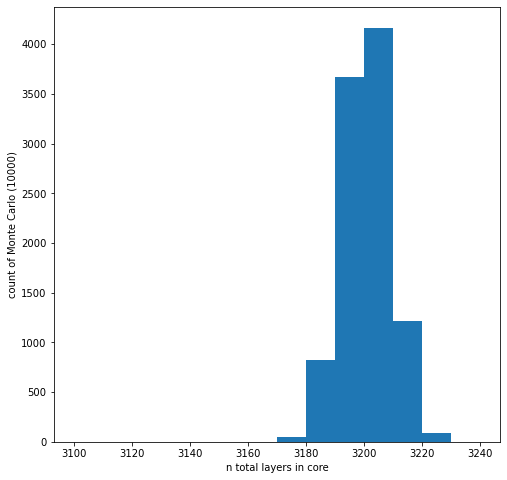

Results of the monte-carlo simulation (n=10,000): 
  minimmun number of layers:3173 
  maximum number of layers:3231
  Average number of layers:3201 
  Median number of layers:3201 
  SD of the simulation:8


In [90]:
minimum = round(min(carlo))
maximum = round(max(carlo))
avg = round(statistics.mean(carlo))
med = round(statistics.median(carlo))
carlo_sd=round(statistics.stdev(carlo))

plt.figure(figsize=(8,8))

plt.hist(carlo,bins=(range(3100,3250,10)))

plt.xlabel('n total layers in core')
plt.ylabel('count of Monte Carlo (10000)')

plt.savefig('plot4.png')

plt.show()

print(f'Results of the monte-carlo simulation (n=10,000): \n  minimmun number of layers:{minimum} \n  maximum number of layers:{maximum}')
print(f'  Average number of layers:{avg} \n  Median number of layers:{med} \n  SD of the simulation:{carlo_sd}')

In [75]:
len(sem)

778

In [14]:
stepsize = 24251/152
start = np.array([i*stepsize for i in range(152)])
print(start)
stop = start + stepsize

print(stop)

[    0.           159.54605263   319.09210526   478.63815789
   638.18421053   797.73026316   957.27631579  1116.82236842
  1276.36842105  1435.91447368  1595.46052632  1755.00657895
  1914.55263158  2074.09868421  2233.64473684  2393.19078947
  2552.73684211  2712.28289474  2871.82894737  3031.375
  3190.92105263  3350.46710526  3510.01315789  3669.55921053
  3829.10526316  3988.65131579  4148.19736842  4307.74342105
  4467.28947368  4626.83552632  4786.38157895  4945.92763158
  5105.47368421  5265.01973684  5424.56578947  5584.11184211
  5743.65789474  5903.20394737  6062.75        6222.29605263
  6381.84210526  6541.38815789  6700.93421053  6860.48026316
  7020.02631579  7179.57236842  7339.11842105  7498.66447368
  7658.21052632  7817.75657895  7977.30263158  8136.84868421
  8296.39473684  8455.94078947  8615.48684211  8775.03289474
  8934.57894737  9094.125       9253.67105263  9413.21710526
  9572.76315789  9732.30921053  9891.85526316 10051.40131579
 10210.94736842 10370.4934210

In [15]:
output_file = pd.DataFrame()

In [16]:
output_file['from_um']=start
output_file['to_um']=stop

output_file['countable_imgs']=n


output_file['avg']=avg

output_file['sd']=sd

output_file['sem']=sem



ValueError: Length of values does not match length of index

In [17]:
output_file.head()

,from_um,to_um
0,0.000000,159.546053
1,159.546053,319.092105
2,319.092105,478.638158
3,478.638158,638.184211
4,638.184211,797.730263


In [18]:
#output_file.to_csv('data.csv')
print(n_h,n_w)
full_core_density_bin = np.zeros((n_h,n_w), dtype = float)
full_core_density_bin.shape[0]


15 152


15

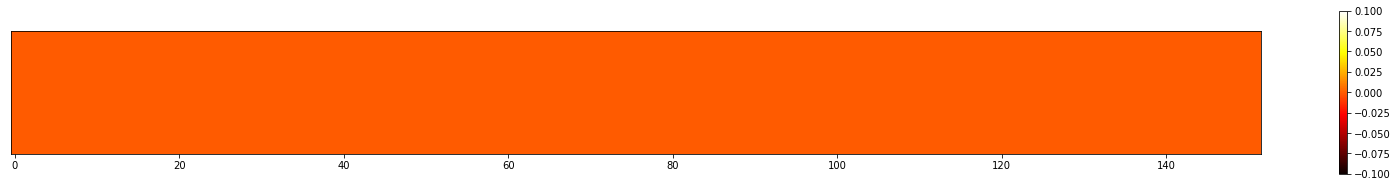

In [19]:
fig3 = plt.figure(figsize=(28,3))
#blended = cv2.addWeighted(full_core_density_bin)
plt.imshow(full_core_density_bin,cmap='hot')
#plt.xticks(ticks=np.linspace(0,layer_matrix.shape[1],7),labels=np.array(np.round(np.linspace(0,24251,7)),dtype=str))
plt.yticks([])
plt.colorbar()
#plt.savefig('plot3.png')
plt.show()

In [ ]:
#Click-Functionality

pt1 = (0,0)
pt2 = (0,0)

click1 = False
click2 = False

pt3 = (0,0)
pt4 = (0,0)

click3 = False
click4 = False

zoom_frame = cv2.resize(full_core.copy(),dsize=(int(full_core.shape[1]/40),int(full_core.shape[0]/40)))
            

def zoomer(event,x,y,flags,param):

    global pt1,pt2,click1,click2
    
    if event == cv2.EVENT_LBUTTONDOWN:

        if click1 == True and click2 == True:
            click1 = False
            click2 = False
            pt1 = (0,0)
            pt2 = (0,0)
            
        elif click1 == False:
            pt1 = (x,y)
            click1 = True
            
        elif click2 == False:
            pt2 = (x,y)
            click2 = True
            
    
    return None

def calc_layers(event,x,y,flags,param):
    
    global pt3,pt4,click3,click4
    
    if event == cv2.EVENT_LBUTTONDOWN:
    
        if click3 == True and click4 == True:
            click3 = False
            click4 = False
            pt3 = (0,0)
            pt4 = (0,0)

        elif click3 == False:
            pt3 = (x,y)
            click3 = True
            
        elif click4 == False:
            pt4 = (x,y)
            click4 = True
        
        
    
    return None


cv2.namedWindow('Core')


# Bind draw_rectangle function to mouse clicks
cv2.setMouseCallback('Core', zoomer) 

frame= cv2.resize(full_core.copy(),dsize=(int(full_core.shape[1]/40),int(full_core.shape[0]/40)))

while True:
    
    if not click1 and not click2: 
        frame= cv2.resize(full_core.copy(),dsize=(int(full_core.shape[1]/40),int(full_core.shape[0]/40)))

    
    if click1 and not click2: 
        cv2.circle(frame, center=pt1, radius=4, color=(0,0,255), thickness=-1)
    
    cv2.imshow('Core', frame)
       
    #drawing rectangle
    if click1 and click2:
        cv2.rectangle(frame, pt1, pt2, (0, 0, 255), 2)
        cv2.imshow('Core', frame)

     #   cv2.namedWindow('Zoom')
     #   cv2.setMouseCallback('Zoom', calc_layers) 

        
        top_left=(40*min(pt1[0],pt2[0]),40*min(pt1[1],pt2[1]))
        bottom_right=(40*max(pt1[0],pt2[0]),40*max(pt1[1],pt2[1]))
      #  top_right=(bottom_right[0],top_left[1])
      #  bottom_left=(bottom_right[1],top_left[0])
       
        zoom_frame= full_core.copy()[top_left[1]:bottom_right[1],top_left[0]:bottom_right[0]]
        zoom_layers=full_core_density_bin.copy()
        zoom_layers=zoom_layers[top_left[1]:bottom_right[1],top_left[0]:bottom_right[0]]/h_in

        while True:
        
            cv2.setMouseCallback('Zoom', calc_layers) 
           
            if not click3 and not click4: 
                zoom_frame= full_core.copy()[top_left[1]:bottom_right[1],top_left[0]:bottom_right[0]]
                
        
            if click3 and not click4: 
                cv2.circle(zoom_frame, center=pt3, radius=4, color=(255,0,0), thickness=-1)
    
            
            if click3 and click4:
                       
                cv2.line(zoom_frame, pt3,pt4, (255, 0, 0), 1)
                cv2.arrowedLine(zoom_frame, pt4, (pt4[0],pt3[1]), (255, 0, 0), 1)
                cv2.line(zoom_frame, pt3, (pt4[0],pt3[1]), (0, 0, 255), 2)              
                cv2.namedWindow('Zoom')
                
                zoom_sum=zoom_layers[pt3[1],pt3[0]:pt4[0]].sum()
                cv2.putText(zoom_frame,str(zoom_sum),pt3,cv2.FONT_HERSHEY_PLAIN,2,(0,0,255))
 
            cv2.imshow('Zoom',zoom_frame)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                click1 = False
                click2 = False
                click3 = False
                click4 = False
                cv2.destroyWindow('Zoom') 
                cv2.setMouseCallback('Core', zoomer) 
                break

          
            
        
    # Display the resulting frame

    # This command let's us quit with the "q" button on a keyboard.
    # Simply pressing X on the window won't work!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
cv2.destroyAllWindows()

In [23]:
cv2.destroyAllWindows()